In [1]:
#Human Resource Management Analytics
#Dataset - https://www.kaggle.com/ludobenistant/hr-analytics
#Author - Akkash K N R

#Problem Statement - Why are our best and most experienced employees leaving prematurely?

In [2]:
#Loading the Raw data and Reading 
hr_input <- read.csv('HR.csv') #renamed the dataset
head(hr_input)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.8,0.86,5,262,6,0,1,0,sales,medium
3,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.72,0.87,5,223,5,0,1,0,sales,low
5,0.37,0.52,2,159,3,0,1,0,sales,low
6,0.41,0.5,2,153,3,0,1,0,sales,low


In [3]:
str(hr_input)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ sales                : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


In [4]:
summary(hr_input)

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                         
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:

In [5]:
hr_input$salary <- ordered(hr_input$salary, levels = c('low','medium','high'))

In [6]:
#Now lets try to understand why employees resigned..
emp_resigned <- hr_input[hr_input$left == '1',]
dim(emp_resigned)

[1] 3571   10

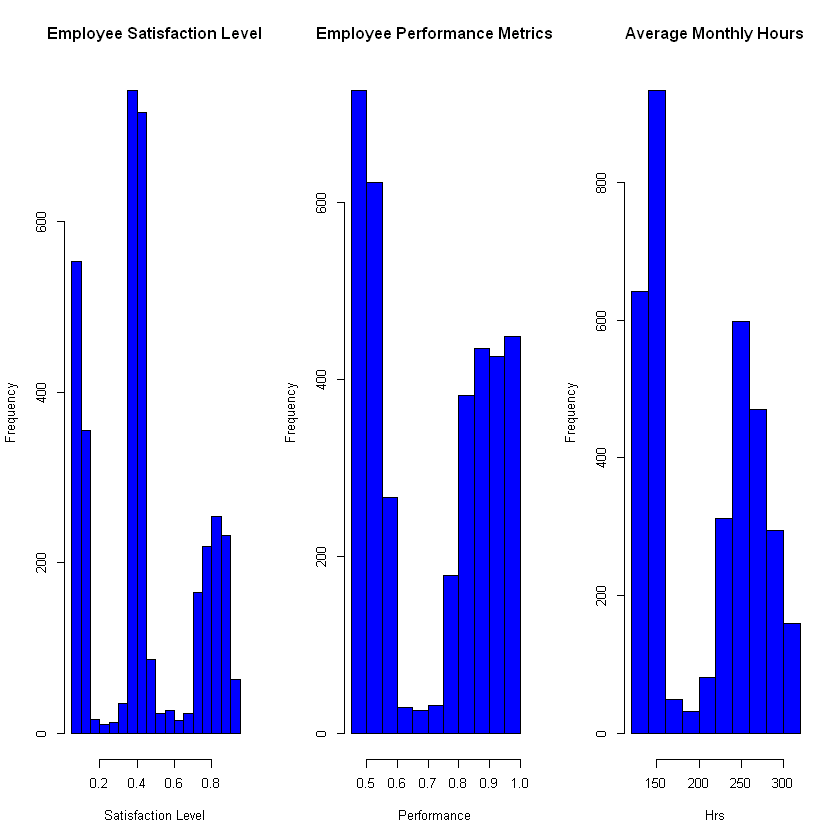

In [7]:
#Understanding using Histogram
#Here the most important features are Satisfaction Level, His Work Performance and His Working Hhours in office
par(mfrow=c(1,3))
#Employees Satisfaction Level
hist(emp_resigned$satisfaction_level, main= 'Employee Satisfaction Level', xlab = 'Satisfaction Level',col='blue')
hist(emp_resigned$last_evaluation, main = 'Employee Performance Metrics', xlab='Performance', col='blue')
hist(emp_resigned$average_montly_hours, main='Average Monthly Hours', xlab='Hrs', col='blue')

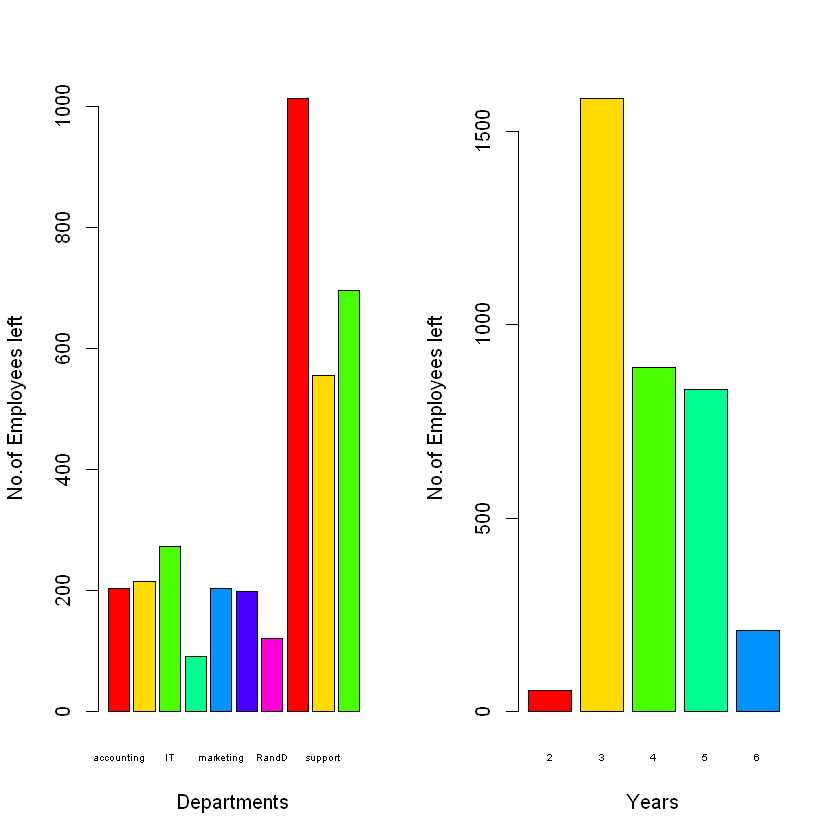

In [19]:
#from the above graph we can understand that
#Most number of employees who left are unhappy according
#Alarmingly More number of employees with Performance above 70% have also left us.
#Here now we have to concentrate on only Best employees who left us

#Lets see how many peoples have left from each department
par(mfrow=c(1,2))
barplot(table(emp_resigned$sales), xlab='Departments',ylab='No.of Employees left',col=rainbow(7), cex.names=0.5)
barplot(table(emp_resigned$time_spend_company), xlab='Years',ylab='No.of Employees left',col=rainbow(7), cex.names=0.5)

In [20]:
#From the above we can understand that Most no fo employees left from sales

#Now lets target the best employees
#We focus on people who has 1. Good ratings, 2. handled more projects and 3. Working for long time, 
#Since these people are Trustworthy 

#We also see that modt number of employees who left the company are from Non-Technical department and 
#people with 3 years of experience. Which we will investigate later 

best_emp_left <- emp_resigned[emp_resigned$last_evaluation >= 0.7 | emp_resigned$number_project > 4 
                              | emp_resigned$time_spend_company > 4 ,]

In [21]:
paste('Total Number of Good Employees left are ', nrow(best_emp_left),' out of ',nrow(emp_resigned))

[1] "Total Number of Good Employees left are  1986  out of  3571"

In [22]:
summary(best_emp_left)

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.4500   Min.   :2.000   Min.   :130.0       
 1st Qu.:0.1000     1st Qu.:0.8400   1st Qu.:5.000   1st Qu.:240.0       
 Median :0.5050     Median :0.8900   Median :5.000   Median :258.0       
 Mean   :0.4637     Mean   :0.8816   Mean   :5.292   Mean   :255.2       
 3rd Qu.:0.8100     3rd Qu.:0.9500   3rd Qu.:6.000   3rd Qu.:277.0       
 Max.   :0.9200     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                         
 time_spend_company Work_accident          left   promotion_last_5years
 Min.   :2.000      Min.   :0.00000   Min.   :1   Min.   :0.000000     
 1st Qu.:4.000      1st Qu.:0.00000   1st Qu.:1   1st Qu.:0.000000     
 Median :5.000      Median :0.00000   Median :1   Median :0.000000     
 Mean   :4.565      Mean   :0.04582   Mean   :1   Mean   :0.002014     
 3rd Qu.:5.000      3rd Qu.:0.00000   3rd Qu.:1 

In [23]:
#From the summary above we can understand that
#1.Satisfaction level is less, 
#2.Working for very long period
#3.most of the employees Salary is Low

#Now Lets start building the model

In [25]:
#Creating a training and testing Dataset
require(caTools)

sample <- sample.split(hr_input$left, SplitRatio = 0.75)
train <- subset(hr_input, sample == TRUE)
test <- subset(hr_input, sample == FALSE)

Loading required package: caTools


In [26]:
table(train$left)


   0    1 
8571 2678 

In [28]:
#Check if there is any missing value
sapply(hr_input,function(x) sum(is.na(x)))

satisfaction_level       last_evaluation        number_project 
                    0                     0                     0 
 average_montly_hours    time_spend_company         Work_accident 
                    0                     0                     0 
                 left promotion_last_5years                 sales 
                    0                     0                     0 
               salary 
                    0

In [29]:
#using logisitic regression
model1 <- glm(as.factor(left)~., data=train, family= binomial(link='logit'))
summary(model1)


Call:
glm(formula = as.factor(left) ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2117  -0.6638  -0.4042  -0.1090   3.0165  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.459498   0.179070  -2.566  0.01029 *  
satisfaction_level    -4.083617   0.112918 -36.164  < 2e-16 ***
last_evaluation        0.842837   0.172853   4.876 1.08e-06 ***
number_project        -0.311119   0.024681 -12.606  < 2e-16 ***
average_montly_hours   0.004363   0.000596   7.321 2.45e-13 ***
time_spend_company     0.272813   0.018018  15.141  < 2e-16 ***
Work_accident         -1.581568   0.104094 -15.194  < 2e-16 ***
promotion_last_5years -1.892797   0.346294  -5.466 4.61e-08 ***
saleshr                0.244753   0.151452   1.616  0.10609    
salesIT               -0.145730   0.140383  -1.038  0.29923    
salesmanagement       -0.431528   0.182205  -2.368  0.01787 *  
salesma

In [30]:
#From the above summary we are still updating our model by removing the sales
model2 <- update(model1, .~.-sales)
summary(model2)


Call:
glm(formula = as.factor(left) ~ satisfaction_level + last_evaluation + 
    number_project + average_montly_hours + time_spend_company + 
    Work_accident + promotion_last_5years + salary, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2036  -0.6643  -0.4079  -0.1119   3.0512  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -0.5111706  0.1442359  -3.544 0.000394 ***
satisfaction_level    -4.0775492  0.1125492 -36.229  < 2e-16 ***
last_evaluation        0.8402585  0.1722972   4.877 1.08e-06 ***
number_project        -0.3111702  0.0245776 -12.661  < 2e-16 ***
average_montly_hours   0.0043690  0.0005943   7.352 1.95e-13 ***
time_spend_company     0.2668059  0.0178154  14.976  < 2e-16 ***
Work_accident         -1.5875155  0.1039430 -15.273  < 2e-16 ***
promotion_last_5years -1.9263221  0.3447000  -5.588 2.29e-08 ***
salary.L              -1.4267070  0

In [39]:
#By removing the sales we have increased the AIC value
#Now lets perform the stepwise regression
model3 <- update(model1, .~1, data = train, family= binomial(link='logit'))

In [40]:
#Forward Stepwise regression
step(model1, scope=c(lower=model1, upper=model3), direction='backward')

Start:  AIC=9682.58
as.factor(left) ~ satisfaction_level + last_evaluation + number_project + 
    average_montly_hours + time_spend_company + Work_accident + 
    promotion_last_5years + sales + salary

                        Df Deviance     AIC
<none>                       9644.6  9682.6
- sales                  9   9682.9  9702.9
- last_evaluation        1   9668.5  9704.5
- promotion_last_5years  1   9690.5  9726.5
- average_montly_hours   1   9698.8  9734.8
- number_project         1   9810.6  9846.6
- time_spend_company     1   9870.1  9906.1
- salary                 2   9943.0  9977.0
- Work_accident          1   9952.6  9988.6
- satisfaction_level     1  11237.9 11273.9



Call:  glm(formula = as.factor(left) ~ satisfaction_level + last_evaluation + 
    number_project + average_montly_hours + time_spend_company + 
    Work_accident + promotion_last_5years + sales + salary, family = binomial(link = "logit"), 
    data = train)

Coefficients:
          (Intercept)     satisfaction_level        last_evaluation  
            -0.459498              -4.083618               0.842837  
       number_project   average_montly_hours     time_spend_company  
            -0.311119               0.004363               0.272813  
        Work_accident  promotion_last_5years                saleshr  
            -1.581568              -1.892797               0.244753  
              salesIT        salesmanagement         salesmarketing  
            -0.145730              -0.431528              -0.047612  
     salesproduct_mng             salesRandD             salessales  
            -0.209725              -0.513568              -0.075012  
         salessupport    

In [41]:
step(model3, scope=c(lower=model3, upper=model1), direction='forward')

Start:  AIC=12349.8
as.factor(left) ~ 1




Call:  glm(formula = as.factor(left) ~ 1, family = binomial(link = "logit"), 
    data = train)

Coefficients:
(Intercept)  
     -1.163  

Degrees of Freedom: 11248 Total (i.e. Null);  11248 Residual
Null Deviance:	    12350 
Residual Deviance: 12350 	AIC: 12350

In [47]:
#From the above we can determine that Model1 is the best
#Validating and predicting it with the Training Dataset itself to check how well the model performs

train_prediction <- predict(model1, newdata = train, type = 'response')

In [54]:
table(test$left)
prediction_train <- data.frame(ifelse(train_prediction>0.5,1,0))
prediction_train$train_actual <- train$left


   0    1 
2857  893 

In [52]:
table(prediction_train)

                                    train_actual
ifelse.train_prediction...0.5..1..0.    0    1
                                   0 7959 1753
                                   1  612  925

In [53]:
test_prediction <- ifelse(predict(model1, newdata=test, type='response')>0.5,1,0)
table(test_prediction, test$left)

               
test_prediction    0    1
              0 2648  572
              1  209  321

In [73]:
misClassification  <- mean(test_prediction != test$left)
print(paste('Accuracy of the model1 is :', 1-misClassification))

[1] "Accuracy of the model1 is : 0.791733333333333"


In [57]:
#JUST TESTING

#We are going to take the following Features
#satisfaction_level    -4.083617   0.112918 -36.164  < 2e-16 ***
#last_evaluation        0.842837   0.172853   4.876 1.08e-06 ***
#number_project        -0.311119   0.024681 -12.606  < 2e-16 ***
#average_montly_hours   0.004363   0.000596   7.321 2.45e-13 ***
#time_spend_company     0.272813   0.018018  15.141  < 2e-16 ***
#promotion_last_5years -1.892797   0.346294  -5.466 4.61e-08 ***

ERROR: Error in parse(text = x, srcfile = src): <text>:6:24: unexpected numeric constant
5: #number_project        -0.311119   0.024681 -12.606  < 2e-16 ***
6: average_montly_hours   0.004363
                          ^


In [68]:
model4 <- update(model1,.~.-sales-salary-Work_accident)

In [69]:
summary(model4)


Call:
glm(formula = as.factor(left) ~ satisfaction_level + last_evaluation + 
    number_project + average_montly_hours + time_spend_company + 
    promotion_last_5years, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2526  -0.6886  -0.4650  -0.2168   3.1401  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.0257036  0.1341629   0.192    0.848    
satisfaction_level    -4.0622065  0.1095507 -37.081  < 2e-16 ***
last_evaluation        0.8326581  0.1657133   5.025 5.04e-07 ***
number_project        -0.3012427  0.0236833 -12.720  < 2e-16 ***
average_montly_hours   0.0042729  0.0005699   7.498 6.48e-14 ***
time_spend_company     0.2171536  0.0166263  13.061  < 2e-16 ***
promotion_last_5years -2.2710889  0.3411781  -6.657 2.80e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)


In [70]:
#quick confusion matrix
table(predict(model4,newdata=test, type='response')>0.5,test$left)

       
           0    1
  FALSE 2639  647
  TRUE   218  246

In [71]:
new_prediction <- ifelse(predict(model4,newdata=test, type='response')>0.5,1,0)
misClassification_model4 <- mean(new_prediction != test$left)

In [77]:
print(paste('Accuracy of model4 is: ', 1-misClassification_model4))

[1] "Accuracy of model4 is:  0.769333333333333"
